In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
#from pydub import AudioSegment
#from pydub.playback import play

In [48]:
df = pd.read_csv("features_3_sec.csv")
labels=df['label']
num=0
one_hot_encode={}
labels_encoded=[]

for i in labels:
    if i not in one_hot_encode.keys():
        one_hot_encode[i]=num
        labels_encoded.append(num)
        num+=1
    else:
        labels_encoded.append(one_hot_encode[i])
df['labels_encoded']=labels_encoded
print(one_hot_encode)
df


{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,labels_encoded
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,0
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues,0
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues,0
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues,0
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock,9
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock,9
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock,9
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock,9


In [49]:
#song = AudioSegment.from_wav("samples/classical.00013.wav")

#play(song)

In [50]:
X = df.copy()
X.drop(['filename', 'label','length'],axis=1,inplace=True)
display(X)
Y=pd.DataFrame(df['labels_encoded'])
display(Y)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,labels_encoded
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,9
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,9
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,9
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,9


,labels_encoded
0,0
1,0
2,0
3,0
4,0
...,...
9985,9
9986,9
9987,9
9988,9


In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1000, random_state=1234)
print(x_train.shape)


(8990, 58)


In [52]:
x_zero=df[['zero_crossing_rate_mean','zero_crossing_rate_var',]]
x_zero_train, x_zero_test, y_train_2, y_test_2 = train_test_split(x_zero, Y, test_size=1000, random_state=1234)
x_spec_cen=df[['spectral_centroid_mean','spectral_centroid_var']]
x_spec_cen_train, x_spec_cen_test, y_train_2, y_test_2 = train_test_split(x_spec_cen, Y, test_size=1000, random_state=1234)
x_spec_ban=df[['spectral_bandwidth_mean','spectral_bandwidth_var']]
x_spec_ban_train, x_spec_ban_test, y_train_2, y_test_2 = train_test_split(x_spec_ban, Y, test_size=1000, random_state=1234)
x_mfcc=df[['mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var']]
x_mfcc_train, x_mfcc_test, y_train_2, y_test_2 = train_test_split(x_mfcc, Y, test_size=1000, random_state=1234)
y_train_2= np.array(y_train_2).reshape(8990)
y_test_2= np.array(y_test_2).reshape(1000)

In [53]:
data_x=X


In [54]:
xn_zero = data_x.copy()
xn_zero.drop(['zero_crossing_rate_mean','zero_crossing_rate_var'],axis=1,inplace=True)
xn_zero_train, xn_zero_test, y_train_3, y_test_3 = train_test_split(xn_zero, Y, test_size=1000, random_state=1234)

xn_spec_cen=data_x.copy()
xn_spec_cen.drop(['spectral_centroid_mean','spectral_centroid_var'],axis=1,inplace=True)
xn_spec_cen_train, xn_spec_cen_test, y_train_3, y_test_3 = train_test_split(xn_spec_cen, Y, test_size=1000, random_state=1234)

xn_spec_ban=data_x.copy()
xn_spec_ban.drop(['spectral_bandwidth_mean','spectral_bandwidth_var'],axis=1,inplace=True)
xn_spec_ban_train, xn_spec_ban_test, y_train_3, y_test_3 = train_test_split(xn_spec_ban, Y, test_size=1000, random_state=1234)

xn_mfcc=data_x.copy()
xn_mfcc.drop(['mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var'],axis=1,inplace=True)
xn_mfcc_train, xn_mfcc_test, yn_train_3, yn_test_3 = train_test_split(xn_mfcc, Y, test_size=1000, random_state=1234)


y_train_3= np.array(y_train_3).reshape(8990)
y_test_3= np.array(y_test_3).reshape(1000)

In [55]:
x_train.shape

(8990, 58)

In [56]:
sc = StandardScaler()

x_train = x_train.iloc[:, :-1]
x_test = x_test.iloc[:, :-1]

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [57]:
x_test.shape

(1000, 57)

In [68]:
def dtclass(criterion,splitter,max_depth):
    clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter,max_depth=max_depth)
    clf = clf.fit(x_train,y_train)
    y_pred1 = clf.predict(x_train)
    print("training Accuracy:",metrics.accuracy_score(y_train, y_pred1))
    y_pred2 = clf.predict(x_test)
    print("testing Accuracy:",metrics.accuracy_score(y_test, y_pred2))

    return metrics.accuracy_score(y_train, y_pred1), metrics.accuracy_score(y_test, y_pred2)
    #print("precision_test",precision_score(y_test, y_pred2,average='macro'))


In [59]:
dtclass('gini','best',3)

training Accuracy: 0.31690767519466073
testing Accuracy: 0.325


In [60]:
dtclass('entropy','best',3)

training Accuracy: 0.37330367074527254
testing Accuracy: 0.392


In [61]:
dtclass("gini",'random',3)


training Accuracy: 0.3407119021134594
testing Accuracy: 0.323


In [62]:
dtclass("entropy",'random',3)

training Accuracy: 0.3703003337041157
testing Accuracy: 0.349


In [63]:
dtclass("entropy",'best',4)

training Accuracy: 0.44449388209121243
testing Accuracy: 0.433


In [64]:
dtclass("entropy",'best',2)

training Accuracy: 0.317686318131257
testing Accuracy: 0.324


In [65]:
dtclass("gini", 'best', 5)

training Accuracy: 0.4550611790878754
testing Accuracy: 0.418


In [66]:
dtclass("gini", 'best', 6)

training Accuracy: 0.5329254727474972
testing Accuracy: 0.497


In [67]:
dtclass("gini", 'best', 7)

training Accuracy: 0.5832035595105673
testing Accuracy: 0.531


In [85]:
a = [0]*20
b = [0]*20
for i in range(1, 20) :
  print("depth :", i)
  a[i],b[i] = dtclass("gini", 'best', i)
  

depth : 1
training Accuracy: 0.17374860956618465
testing Accuracy: 0.164
depth : 2
training Accuracy: 0.24315906562847608
testing Accuracy: 0.259
depth : 3
training Accuracy: 0.31690767519466073
testing Accuracy: 0.325
depth : 4
training Accuracy: 0.3968854282536151
testing Accuracy: 0.408
depth : 5
training Accuracy: 0.4550611790878754
testing Accuracy: 0.418
depth : 6
training Accuracy: 0.5329254727474972
testing Accuracy: 0.498
depth : 7
training Accuracy: 0.5832035595105673
testing Accuracy: 0.53
depth : 8
training Accuracy: 0.62146829810901
testing Accuracy: 0.551
depth : 9
training Accuracy: 0.6741935483870968
testing Accuracy: 0.597
depth : 10
training Accuracy: 0.7334816462736373
testing Accuracy: 0.626
depth : 11
training Accuracy: 0.7863181312569522
testing Accuracy: 0.647
depth : 12
training Accuracy: 0.8341490545050055
testing Accuracy: 0.662
depth : 13
training Accuracy: 0.8802002224694104
testing Accuracy: 0.68
depth : 14
training Accuracy: 0.9182424916573971
testing Accu

In [86]:
a = [0]*20
b = [0]*20
for i in range(1, 20) :
  print("depth :", i)
  a[i],b[i] = dtclass("entropy", 'best', i)
  

depth : 1
training Accuracy: 0.19488320355951055
testing Accuracy: 0.18
depth : 2
training Accuracy: 0.317686318131257
testing Accuracy: 0.324
depth : 3
training Accuracy: 0.37330367074527254
testing Accuracy: 0.392
depth : 4
training Accuracy: 0.44449388209121243
testing Accuracy: 0.433
depth : 5
training Accuracy: 0.4934371523915462
testing Accuracy: 0.46
depth : 6
training Accuracy: 0.5661846496106785
testing Accuracy: 0.521
depth : 7
training Accuracy: 0.632146829810901
testing Accuracy: 0.588
depth : 8
training Accuracy: 0.7104560622914349
testing Accuracy: 0.614
depth : 9
training Accuracy: 0.7690767519466073
testing Accuracy: 0.619
depth : 10
training Accuracy: 0.839377085650723
testing Accuracy: 0.651
depth : 11
training Accuracy: 0.8922135706340378
testing Accuracy: 0.675
depth : 12
training Accuracy: 0.9380422691879866
testing Accuracy: 0.675
depth : 13
training Accuracy: 0.9676307007786429
testing Accuracy: 0.665
depth : 14
training Accuracy: 0.9826473859844271
testing Accur

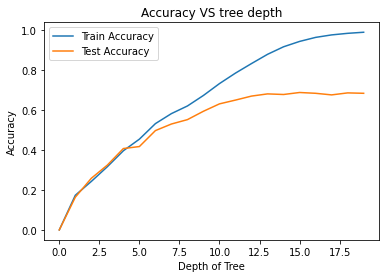

In [82]:
plt.plot(a)
plt.plot(b)
plt.title("Accuracy VS tree depth")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.legend(['Train Accuracy', 'Test Accuracy'])

In [87]:
#random forest
from sklearn.ensemble import RandomForestClassifier


In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1000, random_state=1234)
y_train2= np.array(y_train).reshape(8990)
y_test2= np.array(y_test).reshape(1000)

In [89]:
x_train.shape

(8990, 58)

In [90]:
sc = StandardScaler()

x_train = x_train.iloc[:, :-1]
x_test = x_test.iloc[:, :-1]

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [91]:
from sklearn.model_selection import GridSearchCV


In [92]:
def rfclass(n_estimators,criterion,max_depth):
    clf2=RandomForestClassifier(n_estimators=n_estimators, criterion= criterion,max_depth=max_depth)
    clf2=clf2.fit(x_train,y_train2)
    y_pred_rf1 = clf2.predict(x_train)
    print("training Accuracy:",metrics.accuracy_score(y_train2, y_pred_rf1))
    y_pred_rf2 = clf2.predict(x_test)
    print("testing Accuracy:",metrics.accuracy_score(y_test2, y_pred_rf2))

In [93]:
n_estimators_lt= [50, 100, 200]
max_depth_lt=[3,6,9]
criterion_lt=['entropy','gini']

In [94]:
for i in n_estimators_lt:
    for j in max_depth_lt:
        for k in criterion_lt:
            print(i,j,k)
            rfclass(i,k,j)
            

50 3 entropy
training Accuracy: 0.47419354838709676
testing Accuracy: 0.45
50 3 gini
training Accuracy: 0.492769744160178
testing Accuracy: 0.451
50 6 entropy
training Accuracy: 0.707230255839822
testing Accuracy: 0.627
50 6 gini
training Accuracy: 0.6995550611790878
testing Accuracy: 0.644
50 9 entropy
training Accuracy: 0.9449388209121246
testing Accuracy: 0.784
50 9 gini
training Accuracy: 0.9025583982202448
testing Accuracy: 0.754
100 3 entropy
training Accuracy: 0.4924360400444939
testing Accuracy: 0.464
100 3 gini
training Accuracy: 0.5162402669632925
testing Accuracy: 0.485
100 6 entropy
training Accuracy: 0.7155728587319243
testing Accuracy: 0.641
100 6 gini
training Accuracy: 0.7110122358175751
testing Accuracy: 0.652
100 9 entropy
training Accuracy: 0.9454949944382648
testing Accuracy: 0.786
100 9 gini
training Accuracy: 0.903670745272525
testing Accuracy: 0.762
200 3 entropy
training Accuracy: 0.4788654060066741
testing Accuracy: 0.451
200 3 gini
training Accuracy: 0.5107897

In [95]:
rfModel=RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_train, y_train2)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.473 total time=   2.6s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.468 total time=   2.6s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.467 total time=   2.6s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.466 total time=   5.1s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.480 total time=   5.1s
[CV 3/3; 2/18] START criterion=e

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [96]:
y_pred_grid = model_gridsearch.predict(x_train)
accuracy_grid = metrics.accuracy_score(y_train2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_test)
accuracy_grid = metrics.accuracy_score(y_test2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)


{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.9492769744160178
{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.789


In [97]:
rfModel=RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','random']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_zero_train, y_train_2)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.302 total time=   0.5s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.303 total time=   0.5s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.300 total time=   0.5s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.306 total time=   1.0s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.297 total time=   1.0s
[CV 3/3; 2/18] START criterion=e

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'random'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [98]:
y_pred_grid = model_gridsearch.predict(x_zero_train)
accuracy_grid = metrics.accuracy_score(y_train_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_zero_test)
accuracy_grid = metrics.accuracy_score(y_test_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50}
RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50)
0.3507230255839822
{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50}
RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50)
0.326


In [99]:
rfModel=RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_spec_cen_train, y_train_2)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.349 total time=   0.5s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.347 total time=   0.5s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.352 total time=   0.5s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.345 total time=   1.0s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.344 total time=   1.0s
[CV 3/3; 2/18] START criterion=e

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [100]:
y_pred_grid = model_gridsearch.predict(x_spec_cen_train)
accuracy_grid = metrics.accuracy_score(y_train_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_spec_cen_test)
accuracy_grid = metrics.accuracy_score(y_test_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
RandomForestClassifier(max_depth=6)
0.3913236929922136
{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
RandomForestClassifier(max_depth=6)
0.364


In [101]:
rfModel=RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_spec_ban_train, y_train_2)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.336 total time=   0.5s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.339 total time=   0.5s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.340 total time=   0.5s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.337 total time=   1.0s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.345 total time=   1.0s
[CV 3/3; 2/18] START criterion=e

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(x_spec_ban_train)
accuracy_grid = metrics.accuracy_score(y_train_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_spec_ban_test)
accuracy_grid = metrics.accuracy_score(y_test_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
RandomForestClassifier(max_depth=6, n_estimators=200)
0.37730812013348164
{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
RandomForestClassifier(max_depth=6, n_estimators=200)
0.351


In [ ]:
rfModel=RandomForestClassifier()
rfModel=rfModel.fit(x_mfcc_train,y_train2)
#class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, refit=True, cv=None, return_train_score=False)
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_mfcc_train, y_train_2)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.2s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.2s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   2.6s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   6.4s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   6.6s
[CV 3/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 3/3; 2/18] E

[CV 1/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   5.0s
[CV 2/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 2/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   5.0s
[CV 3/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 3/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   4.3s
[CV 1/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 1/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.1s
[CV 2/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 2/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=   9.4s
[CV 3/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 3/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=   9.5s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(x_mfcc_train)
accuracy_grid = metrics.accuracy_score(y_train_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_mfcc_test)
accuracy_grid = metrics.accuracy_score(y_test_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.928587319243604
{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.711


In [ ]:
rfModel=RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(xn_zero_train, y_train_3)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.4s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.5s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.5s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   6.4s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   7.0s
[CV 3/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 3/3; 2/18] E

[CV 1/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   5.3s
[CV 2/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 2/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   4.7s
[CV 3/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 3/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   5.4s
[CV 1/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 1/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.1s
[CV 2/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 2/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.5s
[CV 3/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 3/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=   9.9s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(xn_zero_train)
accuracy_grid = metrics.accuracy_score(y_train_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(xn_zero_test)
accuracy_grid = metrics.accuracy_score(y_test_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
RandomForestClassifier(criterion='entropy', max_depth=9)
0.9996662958843159
{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
RandomForestClassifier(criterion='entropy', max_depth=9)
0.984


In [ ]:
rfModel=RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(xn_spec_cen_train, y_train_3)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   2.9s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.4s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.5s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   7.0s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   6.2s
[CV 3/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 3/3; 2/18] E

[CV 1/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   4.6s
[CV 2/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 2/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   5.4s
[CV 3/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 3/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   5.4s
[CV 1/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 1/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.1s
[CV 2/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 2/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.1s
[CV 3/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 3/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.8s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(xn_spec_cen_train)
accuracy_grid = metrics.accuracy_score(y_train_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(xn_spec_cen_test)
accuracy_grid = metrics.accuracy_score(y_test_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.9988876529477196
{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.988


In [ ]:
rfModel=RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(xn_spec_ban_train, y_train_3)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.5s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.5s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   3.4s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   6.4s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   7.1s
[CV 3/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 3/3; 2/18] E

[CV 1/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   5.4s
[CV 2/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 2/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   5.4s
[CV 3/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 3/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   4.7s
[CV 1/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 1/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.8s
[CV 2/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 2/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.0s
[CV 3/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 3/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=  10.2s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(xn_spec_ban_train)
accuracy_grid = metrics.accuracy_score(y_train_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(xn_spec_ban_test)
accuracy_grid = metrics.accuracy_score(y_test_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.9993325917686318
{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.984


In [ ]:
rfModel=RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3,6,9],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=rfModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(xn_mfcc_train, y_train_3)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 1/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   1.7s
[CV 2/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 2/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   1.8s
[CV 3/3; 1/18] START criterion=entropy, max_depth=3, n_estimators=50............
[CV 3/3; 1/18] END criterion=entropy, max_depth=3, n_estimators=50; total time=   1.8s
[CV 1/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 1/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   3.7s
[CV 2/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 2/3; 2/18] END criterion=entropy, max_depth=3, n_estimators=100; total time=   3.7s
[CV 3/3; 2/18] START criterion=entropy, max_depth=3, n_estimators=100...........
[CV 3/3; 2/18] E

[CV 1/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   3.0s
[CV 2/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 2/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   3.0s
[CV 3/3; 17/18] START criterion=gini, max_depth=9, n_estimators=100.............
[CV 3/3; 17/18] END criterion=gini, max_depth=9, n_estimators=100; total time=   3.1s
[CV 1/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 1/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=   5.5s
[CV 2/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 2/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=   6.1s
[CV 3/3; 18/18] START criterion=gini, max_depth=9, n_estimators=200.............
[CV 3/3; 18/18] END criterion=gini, max_depth=9, n_estimators=200; total time=   5.4s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(xn_mfcc_train)
accuracy_grid = metrics.accuracy_score(y_train_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(xn_mfcc_test)
accuracy_grid = metrics.accuracy_score(y_test_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
1.0
{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)
0.994


In [ ]:
#dt

In [ ]:
dtModel=DecisionTreeClassifier()
param_grid = {'splitter': ['best','random'],'max_depth': [2,3,1],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=dtModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_zero_train, y_train_2)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 1/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 2/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 2/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 3/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 3/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 1/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 1/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 2/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 2/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 3/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 3/3; 2/12] END crite

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 1],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(x_zero_train)
accuracy_grid = metrics.accuracy_score(y_train_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_zero_test)
accuracy_grid = metrics.accuracy_score(y_test_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3)
0.2872080088987764
{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3)
0.273


In [ ]:
dtModel=DecisionTreeClassifier()
param_grid = {'splitter': ['best','random'],'max_depth': [2,3,1],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=dtModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_spec_cen_train, y_train_2)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 1/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 2/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 2/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 3/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 3/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 1/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 1/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 2/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 2/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 3/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 3/3; 2/12] END crite

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 1],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(x_spec_cen_train)
accuracy_grid = metrics.accuracy_score(y_train_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_spec_cen_test)
accuracy_grid = metrics.accuracy_score(y_test_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.339265850945495
{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.331


In [ ]:
dtModel=DecisionTreeClassifier()
param_grid = {'splitter': ['best','random'],'max_depth': [2,3,1],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=dtModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_spec_ban_train, y_train_2)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 1/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 2/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 2/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 3/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 3/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV 1/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 1/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 2/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 2/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 3/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 3/3; 2/12] END crite

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 1],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(x_spec_ban_train)
accuracy_grid = metrics.accuracy_score(y_train_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_spec_ban_test)
accuracy_grid = metrics.accuracy_score(y_test_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3)
0.3263626251390434
{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3)
0.315


In [ ]:
dtModel=DecisionTreeClassifier()
param_grid = {'splitter': ['best','random'],'max_depth': [2,3,1],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=dtModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(x_mfcc_train, y_train_2)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 1/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 2/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 2/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 3/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 3/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 1/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 1/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 2/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 2/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 3/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 3/3; 2/12] END crite

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 1],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(x_mfcc_train)
accuracy_grid = metrics.accuracy_score(y_train_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(x_mfcc_test)
accuracy_grid = metrics.accuracy_score(y_test_2, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3)
0.3757508342602892
{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3)
0.363


In [ ]:
dtModel=DecisionTreeClassifier()
param_grid = {'splitter': ['best','random'],'max_depth': [2,3,1],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=dtModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(xn_zero_train, y_train_3)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 1/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 2/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 2/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 3/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 3/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 1/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 1/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 2/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 2/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 3/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 3/3; 2/12] END crite

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 1],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(xn_zero_train)
accuracy_grid = metrics.accuracy_score(y_train_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(xn_zero_test)
accuracy_grid = metrics.accuracy_score(y_test_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.8013348164627364
{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.788


In [ ]:
dtModel=DecisionTreeClassifier()
param_grid = {'splitter': ['best','random'],'max_depth': [2,3,1],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=dtModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(xn_spec_cen_train, y_train_3)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 1/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 2/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 2/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 3/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 3/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 1/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 1/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 2/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 2/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 3/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 3/3; 2/12] END crite

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 1],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(xn_spec_cen_train)
accuracy_grid = metrics.accuracy_score(y_train_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(xn_spec_cen_test)
accuracy_grid = metrics.accuracy_score(y_test_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.8013348164627364
{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.788


In [ ]:
dtModel=DecisionTreeClassifier()
param_grid = {'splitter': ['best','random'],'max_depth': [2,3,1],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=dtModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(xn_spec_ban_train, y_train_3)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 1/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 2/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 2/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 3/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 3/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.4s
[CV 1/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 1/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 2/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 2/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 3/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 3/3; 2/12] END crite

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 1],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(xn_spec_ban_train)
accuracy_grid = metrics.accuracy_score(y_train_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(xn_spec_ban_test)
accuracy_grid = metrics.accuracy_score(y_test_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.8013348164627364
{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.788


In [ ]:
dtModel=DecisionTreeClassifier()
param_grid = {'splitter': ['best','random'],'max_depth': [2,3,1],'criterion':['entropy','gini']}
model_gridsearch = GridSearchCV(estimator=dtModel,param_grid=param_grid,verbose=10,scoring='accuracy',n_jobs=1,cv=3)
model_gridsearch.fit(xn_mfcc_train, y_train_3)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 1/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.1s
[CV 2/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 2/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.1s
[CV 3/3; 1/12] START criterion=entropy, max_depth=2, splitter=best..............
[CV 3/3; 1/12] END criterion=entropy, max_depth=2, splitter=best; total time=   0.1s
[CV 1/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 1/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 2/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 2/3; 2/12] END criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV 3/3; 2/12] START criterion=entropy, max_depth=2, splitter=random............
[CV 3/3; 2/12] END crite

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 1],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [ ]:
y_pred_grid = model_gridsearch.predict(xn_mfcc_train)
accuracy_grid = metrics.accuracy_score(y_train_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

y_pred_grid = model_gridsearch.predict(xn_mfcc_test)
accuracy_grid = metrics.accuracy_score(y_test_3, y_pred_grid)
print(model_gridsearch.best_params_)
print(model_gridsearch.best_estimator_)
print(accuracy_grid)

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.8013348164627364
{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3)
0.788
